In [17]:
## Comparison of Logistic Regression versus XGBoost of ictal cases w.r.t. each of the other classes
## Original data file is stripped to create 1 vs. 2, 1 vs. 3, 1 vs. 4 and 1 vs. 5 pieces in R
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

In [18]:
eeg_12 = pd.read_csv("data_12.csv")

In [19]:
eeg_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 6.3 MB


In [20]:
eeg_12.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=179)

In [21]:
# separating the class variable
Y = list(eeg_12.pop('y'))

In [22]:
# creating array of vlaues
X1 = eeg_12.values

In [23]:
# Finding the principal components as 178 features are too much, but camparable
# 50 components saturate variance ratio
pca_12 = PCA(n_components=50)

In [24]:
pca_12.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
var= pca_12.explained_variance_ratio_

In [26]:
var_12=np.cumsum(np.round(pca_12.explained_variance_ratio_, decimals=4)*100)

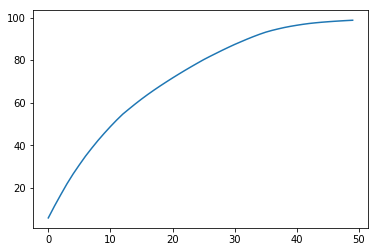

In [28]:
plt.plot(var_12)

In [30]:
X = pca_12.fit_transform(X1)

In [31]:
X.shape

(4600, 50)

In [32]:
# working on the PCA data as effective for all
# 70/30 train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [35]:
# Logistic Regression to train
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# Prediction on test data
Y_pred = logreg.predict(X_test)

In [51]:
from sklearn import metrics
print("Accuracy")
print(metrics.accuracy_score(Y_test, Y_pred))

Accuracy
0.603623188406


In [61]:
# Same set on cross validation
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
# seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=0)

In [62]:
# Logistic on Cross Validation
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
# Prediction on same test split
predict = logreg.predict(x_test)

In [64]:
print("Accuracy_Cross Validation")
print(metrics.accuracy_score(y_test, predict))

Accuracy_Cross Validation
0.643610013175


In [46]:
# XGBoost Clasifier on same cross validated set
import xgboost as xgb
from xgboost import XGBClassifier

In [65]:
# Training on XGBoost Classifier
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [66]:
# Prediction on XGBoost Classifier
pred = model.predict(x_test)
prediction = [round(value) for value in pred]

In [67]:
print("Accuracy_XGBoost")
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(metrics.accuracy_score(y_test, prediction))

Accuracy_XGBoost
Accuracy: 95.52%
0.955204216074


In [122]:
len(x_test)
# Clearly XGBoost is the winning Classifier for this data structure

1518

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
confusion = confusion_matrix(y_test, prediction, labels = [0, 1])

In [71]:
print(confusion)

[[705  39]
 [ 29 745]]


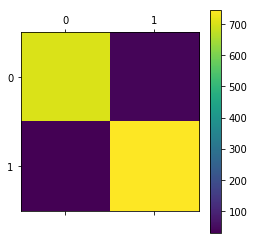

In [72]:
plt.matshow(confusion)
plt.colorbar()
plt.show()

In [121]:
# predicted response with XGBoost Classifier 
# 1 denotes seizure response; 0 denotes probe at epileptic zone but not a seizure response
model.predict(x_test)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [108]:
# print the first 10 predicted probabilities of class membership
model.predict_proba(x_test)

array([[ 0.03969377,  0.96030623],
       [ 0.96634614,  0.03365383],
       [ 0.00531459,  0.99468541],
       ..., 
       [ 0.01400465,  0.98599535],
       [ 0.00228155,  0.99771845],
       [ 0.98973823,  0.01026178]], dtype=float32)

In [114]:
# store the predicted probabilities for class 1
y_pred_prob = model.predict_proba(x_test)

Text(0,0.5,'Frequency')

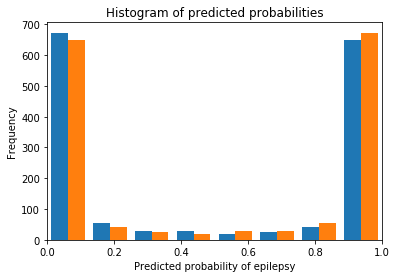

In [115]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of epilepsy')
plt.ylabel('Frequency')

In [116]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([[ 0.03969377,  0.96030623],
       [ 0.96634614,  0.03365383],
       [ 0.00531459,  0.99468541],
       [ 0.01068425,  0.98931575],
       [ 0.11095291,  0.88904709],
       [ 0.99302632,  0.00697371],
       [ 0.99327826,  0.00672171],
       [ 0.91260821,  0.08739177],
       [ 0.02951503,  0.97048497],
       [ 0.93408883,  0.06591119]], dtype=float32)

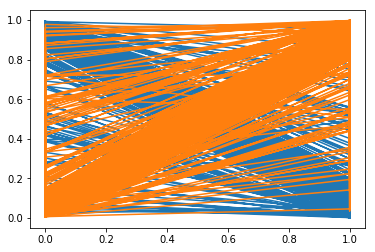

In [117]:
plt.plot(y_test, y_pred_prob)